In [2]:
#import pandas
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load datasets
city_temps = pd.read_csv(r"C:\\Users\\brian\\Desktop\\portfolio\\climate_change\\original\\GlobalLandTemperatures\\GlobalLandTemperaturesByCity.csv")

In [4]:
#Get overview of dataset NA values
city_temps_null = city_temps.isna().sum()

In [5]:
#drop all NAN variables
city_temps.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


In [6]:
#Load continents and countries dataset
continents_countries = pd.read_csv(r"C:\\Users\\brian\\Desktop\\portfolio\\climate_change\\original\\GlobalLandTemperatures\\continent_list.csv")
continents_countries.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Oceania,American Samoa
4,Europe,Andorra


In [7]:
continents = set(continents_countries['Continent'])
continents

{'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', nan}

In [8]:
continents_dict = { 1: "nan",
                    2:"Africa",
                    3: "North America",
                    4: "South America",
                    5: "Europe",
                    6: "Asia",
                    7: "Oceania"}

In [9]:
len(city_temps['Country'])

8599212

In [10]:
#Separate countries by continents\n",
asia = [country for country in continents_countries[continents_countries['Continent']=="Asia"]['Country']]
africa = [country for country in continents_countries[continents_countries['Continent']=="Africa"]['Country']]
europe = [country for country in continents_countries[continents_countries['Continent']=="Europe"]['Country']]
north_america = [country for country in continents_countries[continents_countries['Continent']=="North America"]['Country']]
south_america = [country for country in continents_countries[continents_countries['Continent']=="South America"]['Country']]
oceania = [country for country in continents_countries[continents_countries['Continent']=="Oceania"]['Country']]
"Denmark" in europe

True

In [11]:
#verify continents
city_temps

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [12]:
#Get dates with temperature above normal
#Get records with unhealthy records
#Get all records that can cause hypothermia
#Make a visualization for a given city's records over time.

In [13]:
#Highest Temperature ever recorded
city_temps[city_temps['AverageTemperature']==city_temps['AverageTemperature'].max()]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8148236,1761-07-01,39.651,4.316,Warqla,Algeria,31.35N,5.65E


In [14]:
#Lowest Temperature ever recorded
city_temps[city_temps['AverageTemperature']==city_temps['AverageTemperature'].min()]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5308640,1979-02-01,-42.704,0.972,Norilsk,Russia,69.92N,88.83E


In [15]:
country_temps = pd.DataFrame()
# temps['Country'] = city_temps.groupby("Country")
country_temps['MaxTemp'] = city_temps.groupby("Country")["AverageTemperature"].max()
country_temps['LowTemp'] = city_temps.groupby("Country")['AverageTemperature'].min()
country_temps['Difference'] = abs(country_temps['MaxTemp'] - country_temps['LowTemp'])
country_temps

,MaxTemp,LowTemp,Difference
Country,,,
Afghanistan,32.950,-8.192,41.142
Albania,27.361,2.831,24.530
Algeria,39.651,2.228,37.423
Angola,28.085,14.897,13.188
Argentina,29.509,-1.460,30.969
...,...,...,...
Venezuela,31.591,18.391,13.200
Vietnam,31.972,9.324,22.648
Yemen,31.085,19.926,11.159


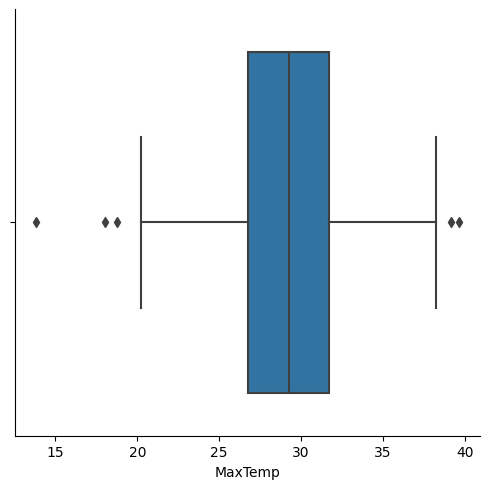

In [20]:
max_temps = sns.catplot(x="MaxTemp",data=country_temps,kind='box')
max_temps

In [17]:
#Group temperature datasets by city per country
city_minmax = pd.DataFrame()
city_minmax['MaxTemp'] = city_temps.groupby("City")["AverageTemperature"].max()
city_minmax['LowTemp'] = city_temps.groupby("City")['AverageTemperature'].min()
city_minmax['Difference'] = abs(city_minmax['MaxTemp'] - city_minmax['LowTemp'])
city_minmax["City"] = city_minmax.index
city_minmax

,MaxTemp,LowTemp,Difference,City
City,,,,
A Coruña,22.052,4.455,17.597,A Coruña
Aachen,22.812,-7.720,30.532,Aachen
Aalborg,20.883,-7.816,28.699,Aalborg
Aba,30.036,23.458,6.578,Aba
Abadan,38.531,7.964,30.567,Abadan
...,...,...,...,...
Århus,20.883,-7.816,28.699,Århus
Çorlu,26.891,-0.966,27.857,Çorlu
Çorum,24.746,-6.127,30.873,Çorum


In [18]:
#Get City with the highest difference in temperature extremes
city_minmax[city_minmax['Difference']==city_minmax['Difference'].max()]

,MaxTemp,LowTemp,Difference,City
City,,,,
Yichun,30.589,-30.421,61.01,Yichun


In [19]:
#Get the temperature Maximum, Minimum and Difference between extremes for a country
city_minmax[city_minmax["City"]=="Kumasi"]

,MaxTemp,LowTemp,Difference,City
City,,,,
Kumasi,30.247,22.808,7.439,Kumasi
